In [1]:
import sqlite3
import requests
import pandas as pd

import json
from datetime import date


In [2]:
def fetch_data(area_type, year):
    base_url = "https://apisidra.ibge.gov.br/values/t/5457/n6/all/v/{}/p/{}/c782/40124?formato=json"
    url = base_url.format(area_type, year)
    response = requests.get(url)
    print(response.status_code)
    if response.status_code == 200:
        print("--------")
        return response.json()
    else:
        return None

def fetch_area_colhida(year):
    return fetch_data(216, year)

def fetch_quantidade_produzida(year):
    return fetch_data(214, year)

In [3]:
data = fetch_area_colhida(2019)

# Verificar se os dados foram obtidos corretamente
if data:
    # Criar uma lista de dicionários para armazenar os dados
    data_list = []
    
    # Ignorar o cabeçalho e processar os dados
    for entry in data[1:]:
        data_list.append({
            "Município": entry['D1N'],
            "Ano": entry['D3N'],
            "Quantidade Produzida": entry['V'],
        })
    
    # Criar o DataFrame
    df = pd.DataFrame(data_list)
    
    # Exibir o DataFrame
    print(df)
else:
    print("Erro ao buscar dados da API.")

200
--------
                       Município   Ano Quantidade Produzida
0     Alta Floresta D'Oeste - RO  2019                  450
1                 Ariquemes - RO  2019                 7893
2                    Cabixi - RO  2019                24630
3                    Cacoal - RO  2019                 1000
4                Cerejeiras - RO  2019                35190
...                          ...   ...                  ...
5558             Vianópolis - GO  2019                40000
5559         Vicentinópolis - GO  2019                20400
5560               Vila Boa - GO  2019                  250
5561          Vila Propício - GO  2019                16500
5562               Brasília - DF  2019                75000

[5563 rows x 3 columns]


In [4]:
def setup_database():
    conn = sqlite3.connect('agricultura.db')
    cursor = conn.cursor()

    cursor.execute('''
    CREATE TABLE IF NOT EXISTS area_colhida (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        municipio TEXT NOT NULL,
        ano DATE NOT NULL,
        valor REAL
    )
    ''')

    cursor.execute('''
    CREATE TABLE IF NOT EXISTS quantidade_produzida (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        municipio TEXT NOT NULL,
        ano INTEGER NOT NULL,
        valor TEXT
    )
    ''')

    conn.commit()
    conn.close()

In [5]:
def insert_or_update(year):
    conn = sqlite3.connect('agricultura.db')
    cursor = conn.cursor()

    area_data = fetch_area_colhida(year)
    if area_data:
        for entry in area_data[1:]:  # Ignorar o cabeçalho
            municipio = entry['D1N']
            ano = entry['D3N']
            Quantidade_Colhida = entry['V']
            cursor.execute('''
            INSERT INTO area_colhida (municipio, ano, valor) VALUES (?, ?, ?);
            ''', (municipio, ano, Quantidade_Colhida))

    # Inserir ou atualizar dados de quantidade produzida
    quantidade_data = fetch_quantidade_produzida(year)
    if quantidade_data:
        for entry in quantidade_data[1:]:  # Ignorar o cabeçalho
            municipio = entry['D1N']
            ano = entry['D3N']
            Quantidade_Produzida = entry['V']
            cursor.execute('''
            INSERT INTO quantidade_produzida (municipio, ano, valor) VALUES (?, ?, ?);
            ''', (municipio, ano, Quantidade_Produzida))

    conn.commit()
    conn.close()

def delete(year):
    conn = sqlite3.connect('agricultura.db')
    cursor = conn.cursor()

    cursor.execute('DELETE FROM area_colhida WHERE ano = ?', (year,))
    cursor.execute('DELETE FROM quantidade_produzida WHERE ano = ?', (year,))

    conn.commit()
    conn.close()


In [6]:
# Configurar o banco de dados
setup_database()

# Testar inserção e atualização
year = 2019
insert_or_update(year)
print(f"Dados para o ano {year} inseridos/atualizados com sucesso.")

# Testar remoção
# delete(year)
# print(f"Dados para o ano {year} removidos com sucesso.")


In [1]:
import AgricultureDB
from datetime import date

# Exemplo de uso
db = AgricultureDB.AgricultureDB("../db/agricultura.db")
ano_inicio = 2018

ano_atual = date.today().year

intervalo_anos = str(ano_inicio) + '-' + str(ano_atual)

print(intervalo_anos)

db.insert_or_update(intervalo_anos)
print("Dados inseridos/atualizados com sucesso: ", intervalo_anos )
# db.insert_combined_data()
# print("Dados inseridos/atualizados com sucesso: ", intervalo_anos )

# Deletar dados para o ano 2019
# db.delete(2019)
# print("Dados para o ano 2019 deletados com sucesso.")




Banco de dados já existe. Excluindo dados existentes...
Dados excluídos com sucesso!
2018-2024
Iniciando a população das tabelas de área colhida e produzida
Populadas as tabelas de área colhida e produzida
Dados inseridos/atualizados com sucesso:  2018-2024


In [ ]:
conn = sqlite3.connect('agricultura.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM VW_produtividade")
rows = cursor.fetchall()
for row in rows:
    print(row)
conn.close()

In [3]:
import sqlite3

conn = sqlite3.connect('agricultura.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM VW_produtividade")
rows = cursor.fetchall()
# for row in rows:
#     print(row)
conn.close()

In [ ]:
print(date.today().year)


2024


In [4]:
print(rows)

[('AC', 2018, 2.94), ('AC', 2019, 3.18), ('AC', 2020, 3.16), ('AC', 2021, 3.37), ('AC', 2022, 3.45), ('AL', 2018, 2.32), ('AL', 2019, 3.3), ('AL', 2020, 3.79), ('AL', 2021, 2.84), ('AL', 2022, 3.29), ('AM', 2018, None), ('AM', 2019, 3.0), ('AM', 2020, 2.96), ('AM', 2021, 3.33), ('AM', 2022, 2.33), ('AP', 2018, 3.11), ('AP', 2019, 2.53), ('AP', 2020, 2.38), ('AP', 2021, 2.68), ('AP', 2022, 2.77), ('BA', 2018, 3.94), ('BA', 2019, 3.36), ('BA', 2020, 3.75), ('BA', 2021, 4.02), ('BA', 2022, 3.71), ('CE', 2018, 2.38), ('CE', 2019, None), ('CE', 2020, 3.0), ('CE', 2021, 3.2), ('CE', 2022, 3.49), ('DF', 2018, 3.0), ('DF', 2019, 3.0), ('DF', 2020, 3.0), ('DF', 2021, 3.0), ('DF', 2022, 3.0), ('ES', 2018, None), ('ES', 2019, None), ('ES', 2020, None), ('ES', 2021, None), ('ES', 2022, 2.5), ('GO', 2018, 3.46), ('GO', 2019, 3.26), ('GO', 2020, 3.59), ('GO', 2021, 3.54), ('GO', 2022, 3.69), ('MA', 2018, 2.97), ('MA', 2019, 2.92), ('MA', 2020, 3.18), ('MA', 2021, 3.17), ('MA', 2022, 3.22), ('MG', 20

In [20]:
import pandas as pd

df = pd.DataFrame(rows, columns=['estado', 'ano', 'produtividade'])

print(df.isnull().values.any())

# Verificar se há valores nulos em uma coluna específica, por exemplo, 'produtividade'
print(df['produtividade'].isnull().sum())

True
27


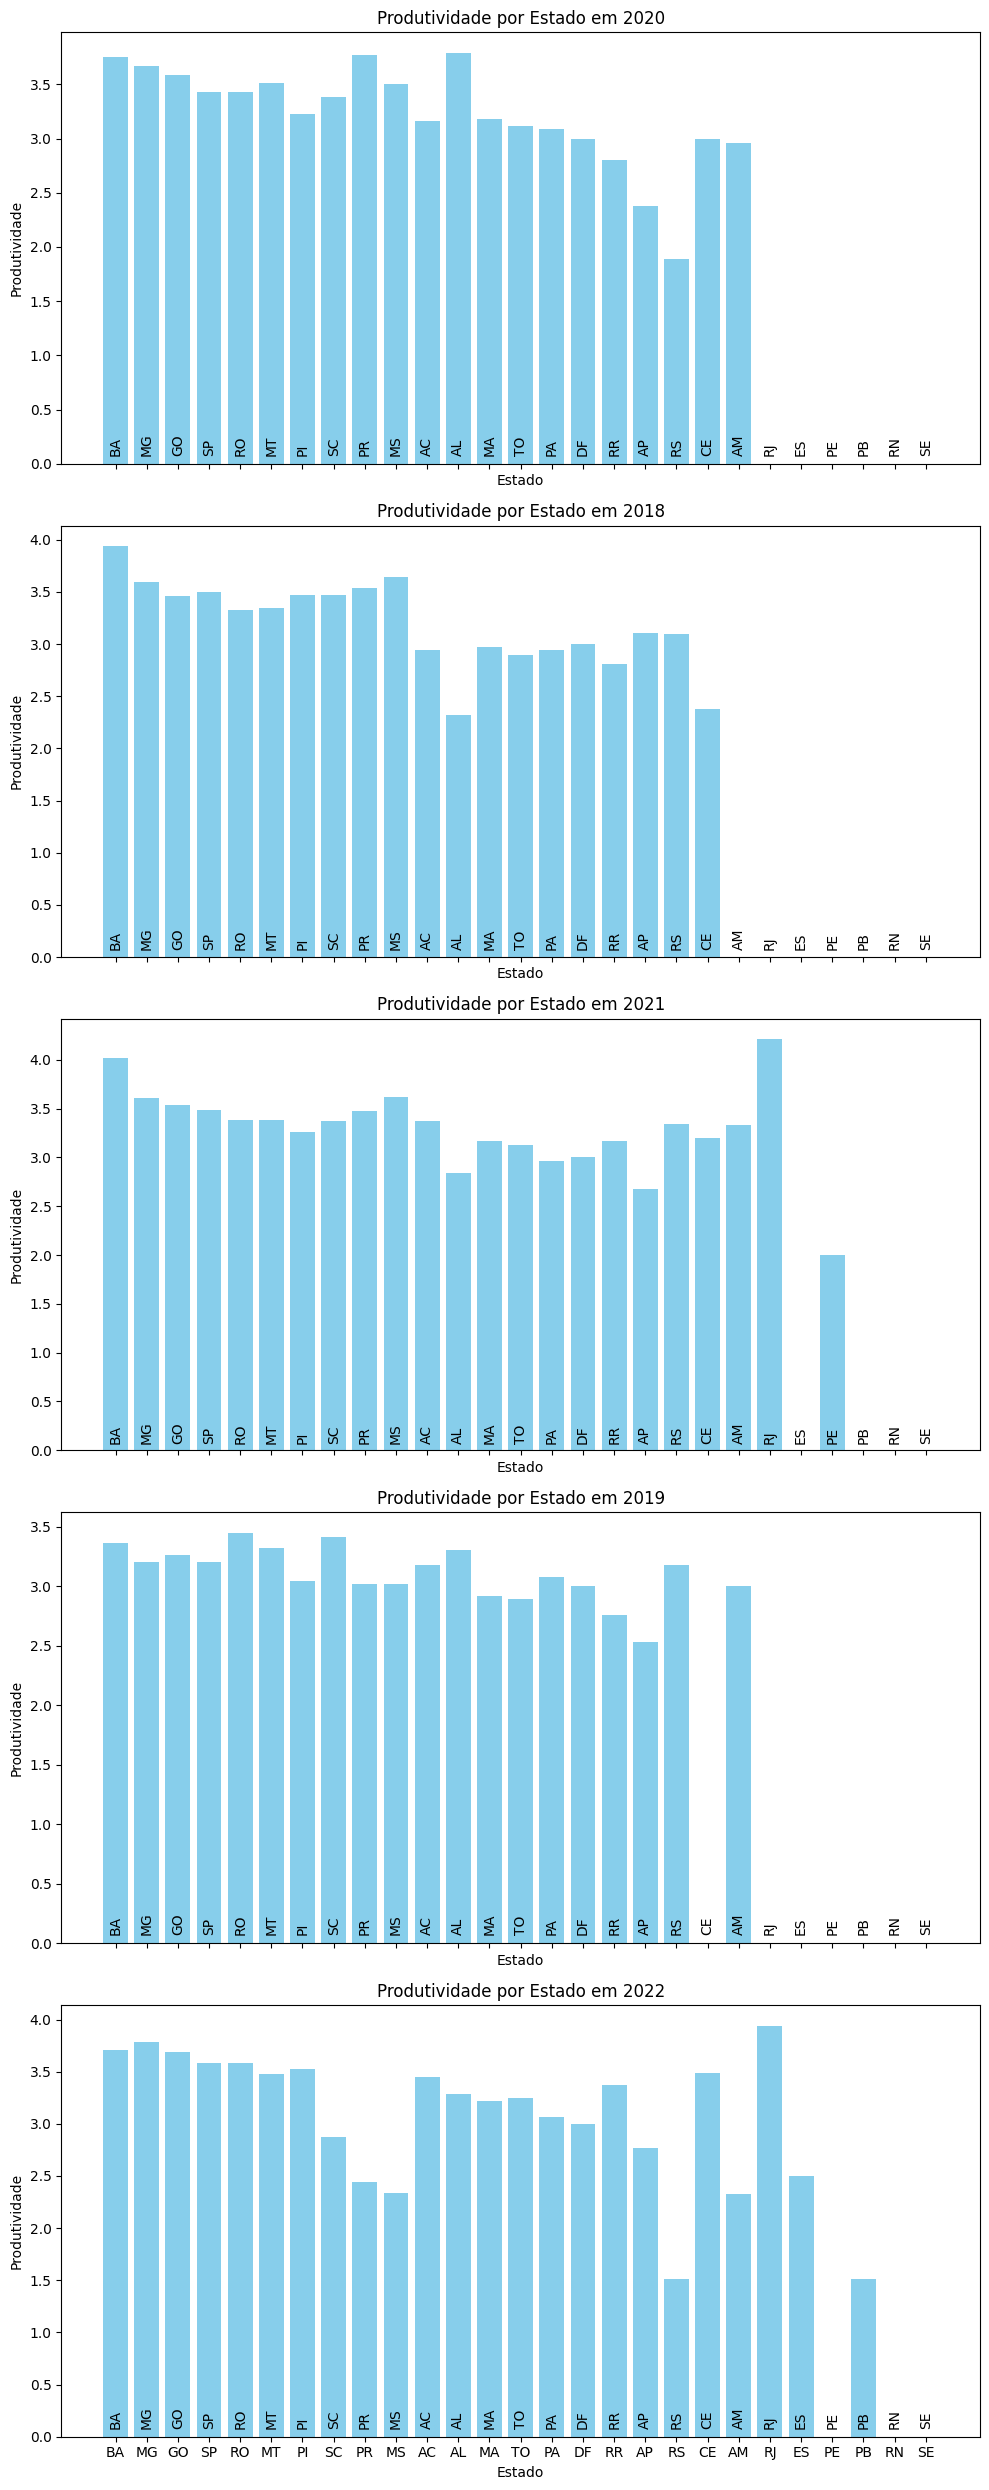

In [26]:
import pandas as pd
import numpy as np

# Suponha que você tenha criado o DataFrame df
df = pd.DataFrame(rows, columns=['estado', 'ano', 'produtividade'])

# Substituir valores nulos por zero na coluna 'produtividade'
df['produtividade'] = df['produtividade'].fillna(0)

# Calcular a média da produtividade por estado
produtividade_media = df.groupby('estado', observed=True)['produtividade'].mean().sort_values(ascending=False)

# Ordenar os estados com base na média da produtividade
df['estado'] = pd.Categorical(df['estado'], categories=produtividade_media.index, ordered=True)
df = df.sort_values('estado')

# Obter os anos únicos
anos = df['ano'].unique()

# Configurar os subplots
fig, axs = plt.subplots(len(anos), 1, figsize=(10, 5 * len(anos)), sharex=True)

# Plotar os dados para cada ano
for i, ano in enumerate(anos):
    subset = df[df['ano'] == ano]
    x = np.arange(len(subset['estado']))  # Posições das barras
    axs[i].bar(x, subset['produtividade'], color='skyblue')
    axs[i].set_title(f'Produtividade por Estado em {ano}')
    axs[i].set_xlabel('Estado')
    axs[i].set_ylabel('Produtividade')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(subset['estado'])
    
    # Adicionar legenda de estado
    for j, estado in enumerate(subset['estado']):
        axs[i].text(j, 0.1, estado, rotation=90, ha='center')

plt.tight_layout()
plt.show()


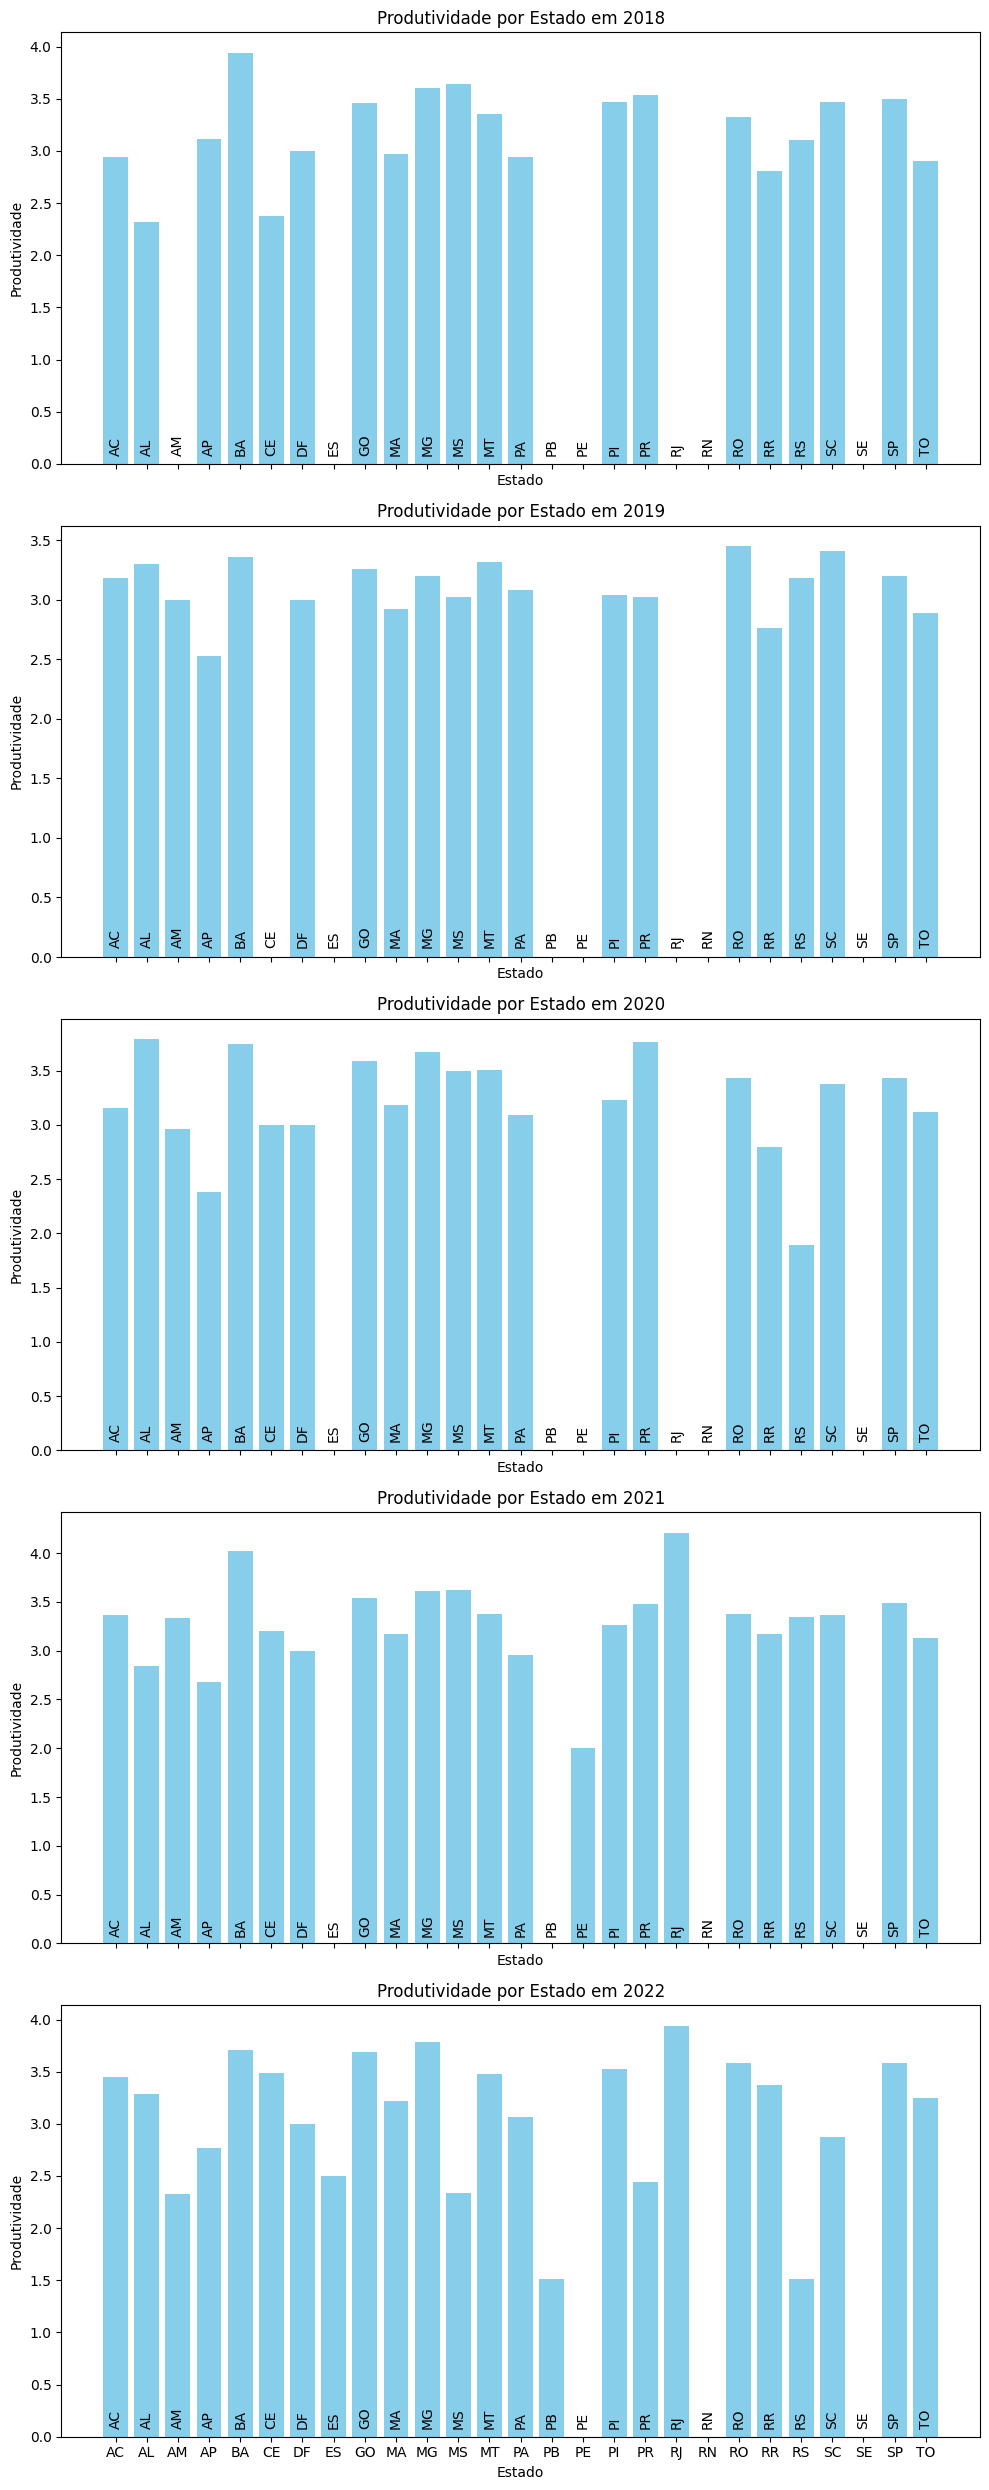

In [16]:
anos = df['ano'].unique()

# Configurar os subplots
fig, axs = plt.subplots(len(anos), 1, figsize=(10, 5 * len(anos)), sharex=True)

# Plotar os dados para cada ano
for i, ano in enumerate(anos):
    subset = df[df['ano'] == ano]
    x = np.arange(len(subset['estado']))  # Posições das barras
    axs[i].bar(x, subset['produtividade'], color='skyblue')
    axs[i].set_title(f'Produtividade por Estado em {ano}')
    axs[i].set_xlabel('Estado')
    axs[i].set_ylabel('Produtividade')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(subset['estado'])
    
    # Adicionar legenda de estado
    for j, estado in enumerate(subset['estado']):
        axs[i].text(j, 0.1, estado, rotation=90, ha='center')

plt.tight_layout()
plt.show()

In [7]:
df.head()

,estado,ano,produtividade
0,AC,2018,2.94
1,AC,2019,3.18
2,AC,2020,3.16
3,AC,2021,3.37
4,AC,2022,3.45


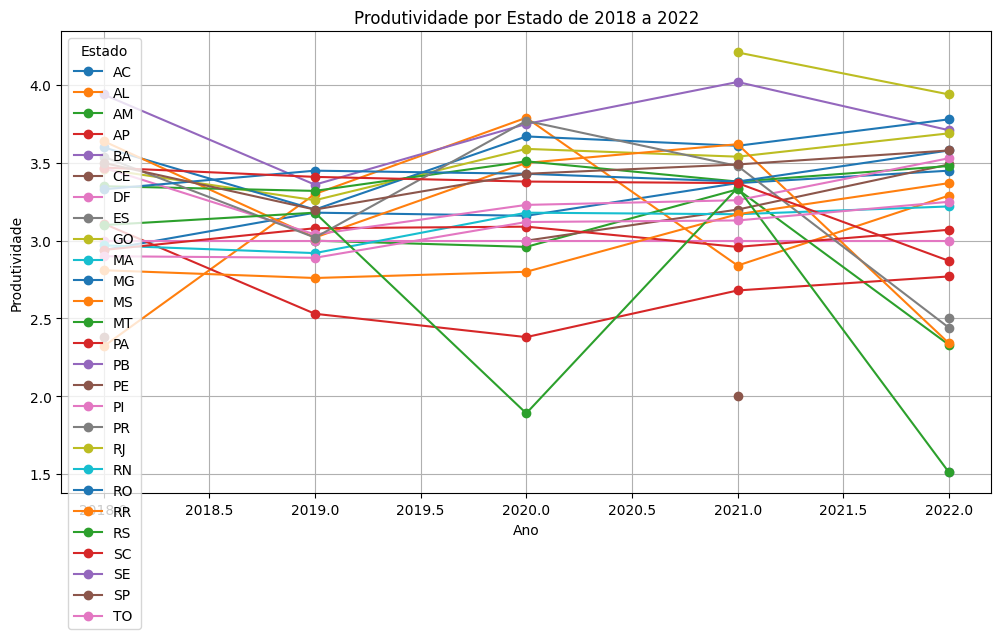

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
# Configurar o gráfico
plt.figure(figsize=(12, 6))

# Plotar os dados para cada estado
for estado in df['estado'].unique():
    subset = df[df['estado'] == estado]
    plt.plot(subset['ano'], subset['produtividade'], marker='o', label=estado)

# Adicionar título e rótulos
plt.title('Produtividade por Estado de 2018 a 2022')
plt.xlabel('Ano')
plt.ylabel('Produtividade')
plt.legend(title='Estado')
plt.grid(True)

ValueError: The number of FixedLocator locations (135), usually from a call to set_ticks, does not match the number of labels (27).

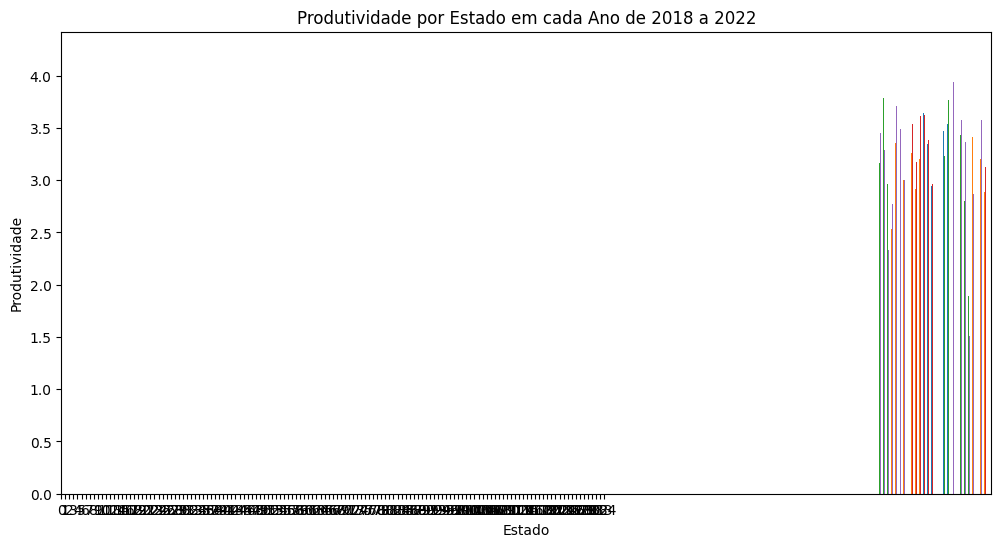

In [12]:
import numpy as np

anos = df['ano'].unique()

# Configurar o gráfico
plt.figure(figsize=(12, 6))

# Plotar os dados para cada ano
for ano in anos:
    subset = df[df['ano'] == ano]
    x = np.arange(len(subset['estado']))  # Posições das barras
    plt.bar(x + ano * 0.1, subset['produtividade'], width=0.1, label=ano)  # Adicionando um pequeno deslocamento horizontal para evitar a sobreposição

# Adicionar título e rótulos
plt.title('Produtividade por Estado em cada Ano de 2018 a 2022')
plt.xlabel('Estado')
plt.ylabel('Produtividade')
plt.xticks(np.arange(len(df['estado'])), df['estado'].unique())  # Rótulos no eixo x
plt.legend(title='Ano')
plt.grid(True)

# Mostrar o gráfico
plt.show()

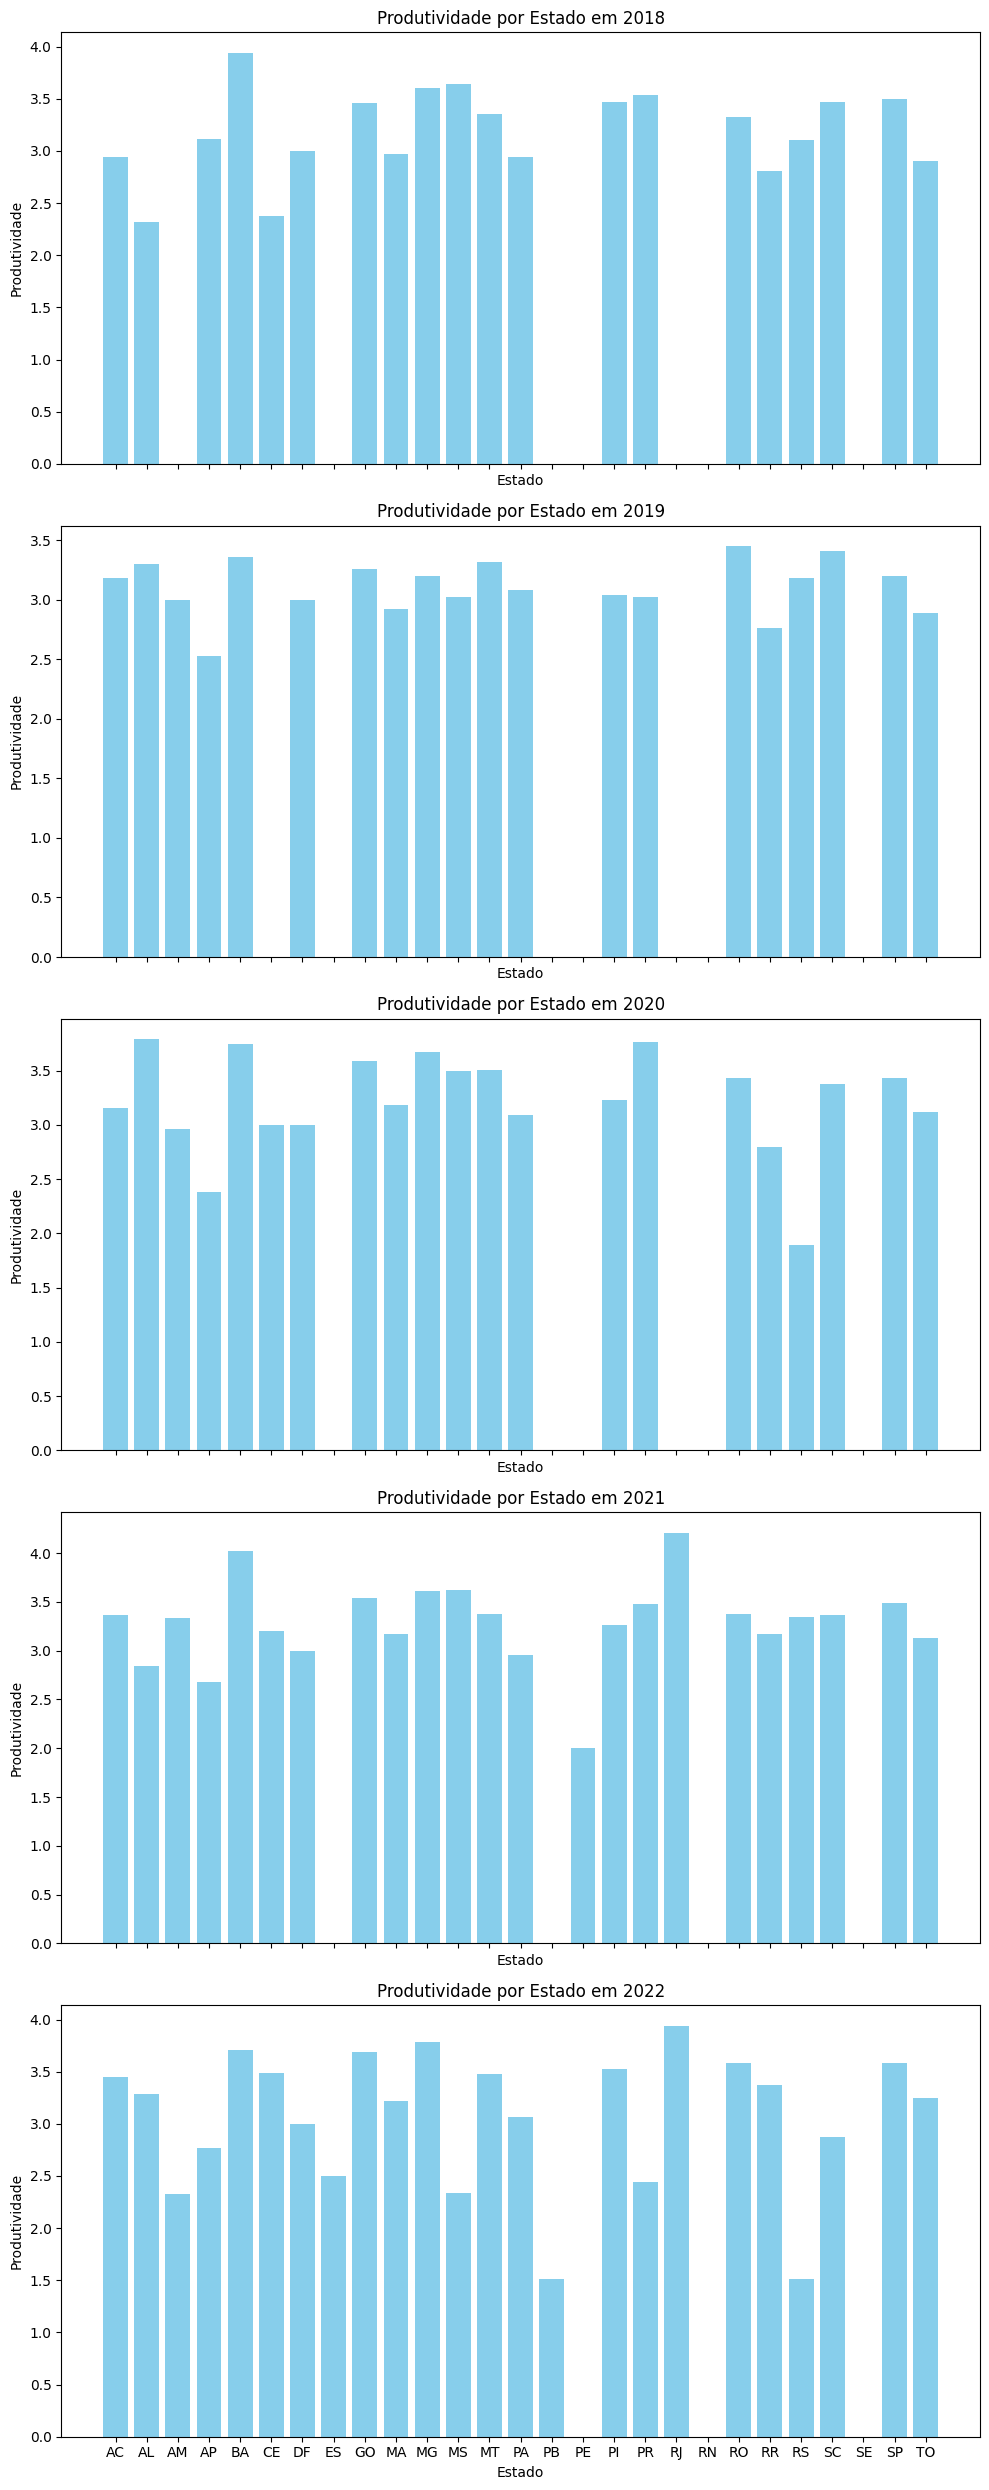

In [14]:
# Obter os anos únicos
anos = df['ano'].unique()

# Configurar os subplots
fig, axs = plt.subplots(len(anos), 1, figsize=(10, 5 * len(anos)), sharex=True)

# Plotar os dados para cada ano
for i, ano in enumerate(anos):
    subset = df[df['ano'] == ano]
    x = np.arange(len(subset['estado']))  # Posições das barras
    axs[i].bar(x, subset['produtividade'], color='skyblue')
    axs[i].set_title(f'Produtividade por Estado em {ano}')
    axs[i].set_xlabel('Estado')
    axs[i].set_ylabel('Produtividade')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(subset['estado'])

plt.tight_layout()
plt.show()